In [1]:
import os
import cv2
import numpy as np
from glob import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from tqdm import tqdm

In [3]:
new_path = './Surface_002/MASK'
file_list = [os.path.join(new_path, file_name) for file_name in os.listdir(new_path)]
for file_ in tqdm(file_list):
    img = cv2.imread(file_, cv2.IMREAD_GRAYSCALE)
    cv2.imwrite('./Surface_002/Grayscale/' + file_.strip("./Surface_002/MASK"), img)

100%|██████████| 113/113 [00:04<00:00, 24.17it/s]


In [ ]:
113

In [4]:
cd ./Surface_002

C:\Users\tjs01\Desktop\Jupyter\Surface_002


In [5]:
IMAGE_SIZE = 512
BATCH_SIZE = 4
NUM_CLASSES = 21
NUM_TRAIN_IMAGES = 80
NUM_VAL_IMAGES = 33

train_images = sorted(glob(os.path.join("./Original/*.jpg")))[:NUM_TRAIN_IMAGES]
train_masks = sorted(glob(os.path.join("./Grayscale/*")))[:NUM_TRAIN_IMAGES]
val_images = sorted(glob(os.path.join("./Original/*.jpg")))[NUM_TRAIN_IMAGES : (NUM_VAL_IMAGES + NUM_TRAIN_IMAGES)]
val_masks = sorted(glob(os.path.join("./Grayscale/*")))[NUM_TRAIN_IMAGES : (NUM_VAL_IMAGES + NUM_TRAIN_IMAGES)]


def read_image(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.image.decode_png(image, channels=1)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    else:
        image = tf.image.decode_png(image, channels=3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 127.5 - 1
    return image


def load_data(image_list, mask_list):
    image = read_image(image_list)
    mask = read_image(mask_list, mask=True)
    return image, mask


def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
    return dataset


train_dataset = data_generator(train_images, train_masks)
val_dataset = data_generator(val_images, val_masks)

print("Train Dataset:", train_dataset)
print("Val Dataset:", val_dataset)

Train Dataset: <BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>
Val Dataset: <BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>


In [122]:
dir(train_dataset)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__debug_string__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_common_args',
 '_consumers',
 '_convert_variables_to_tensors',
 '_deferred_dependencies',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_drop_remainder',
 '_export_to_saved_model_graph',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_ch

In [16]:
read_image('./Grayscale/MP_SEL_SUR_000121.png', mask=True)

<tf.Tensor: shape=(512, 512, 1), dtype=float32, numpy=
array([[[197.],
        [197.],
        [197.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[197.],
        [197.],
        [197.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[197.],
        [197.],
        [197.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       ...,

       [[197.],
        [197.],
        [197.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[197.],
        [197.],
        [197.],
        ...,
        [  0.],
        [  0.],
        [  0.]],

       [[197.],
        [197.],
        [197.],
        ...,
        [  0.],
        [  0.],
        [  0.]]], dtype=float32)>

In [16]:
import pandas as pd

In [14]:
image_list = os.listdir('./Grayscale')

In [17]:
dfdf = pd.DataFrame()

In [69]:
pd.DataFrame(cv2.imread('./Grayscale/'+image_list[0], cv2.IMREAD_GRAYSCALE))

,0,1,2,3,4,5,6,7,8,9,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
2,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
3,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
4,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1076,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1077,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1078,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0


In [75]:
dfdf = pd.DataFrame()

In [78]:
image_list[0]

'MP_SEL_SUR_000121.png'

In [18]:
for i in image_list:
    dfdf = dfdf.append(pd.DataFrame(cv2.imread('./Grayscale/{}'.format(i), cv2.IMREAD_GRAYSCALE)))

C:\Users\tjs01\AppData\Local\Temp\ipykernel_49052\2263076222.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfdf = dfdf.append(pd.DataFrame(cv2.imread('./Grayscale/{}'.format(i), cv2.IMREAD_GRAYSCALE)))
C:\Users\tjs01\AppData\Local\Temp\ipykernel_49052\2263076222.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfdf = dfdf.append(pd.DataFrame(cv2.imread('./Grayscale/{}'.format(i), cv2.IMREAD_GRAYSCALE)))
C:\Users\tjs01\AppData\Local\Temp\ipykernel_49052\2263076222.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfdf = dfdf.append(pd.DataFrame(cv2.imread('./Grayscale/{}'.format(i), cv2.IMREAD_GRAYSCALE)))
C:\Users\tjs01\AppData\Local\Temp\ipykernel_49052\2263076222.py:2: FutureWarning: The frame.append method is 

C:\Users\tjs01\AppData\Local\Temp\ipykernel_49052\2263076222.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfdf = dfdf.append(pd.DataFrame(cv2.imread('./Grayscale/{}'.format(i), cv2.IMREAD_GRAYSCALE)))
C:\Users\tjs01\AppData\Local\Temp\ipykernel_49052\2263076222.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfdf = dfdf.append(pd.DataFrame(cv2.imread('./Grayscale/{}'.format(i), cv2.IMREAD_GRAYSCALE)))
C:\Users\tjs01\AppData\Local\Temp\ipykernel_49052\2263076222.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfdf = dfdf.append(pd.DataFrame(cv2.imread('./Grayscale/{}'.format(i), cv2.IMREAD_GRAYSCALE)))
C:\Users\tjs01\AppData\Local\Temp\ipykernel_49052\2263076222.py:2: FutureWarning: The frame.append method is 

C:\Users\tjs01\AppData\Local\Temp\ipykernel_49052\2263076222.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfdf = dfdf.append(pd.DataFrame(cv2.imread('./Grayscale/{}'.format(i), cv2.IMREAD_GRAYSCALE)))
C:\Users\tjs01\AppData\Local\Temp\ipykernel_49052\2263076222.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfdf = dfdf.append(pd.DataFrame(cv2.imread('./Grayscale/{}'.format(i), cv2.IMREAD_GRAYSCALE)))
C:\Users\tjs01\AppData\Local\Temp\ipykernel_49052\2263076222.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfdf = dfdf.append(pd.DataFrame(cv2.imread('./Grayscale/{}'.format(i), cv2.IMREAD_GRAYSCALE)))
C:\Users\tjs01\AppData\Local\Temp\ipykernel_49052\2263076222.py:2: FutureWarning: The frame.append method is 

C:\Users\tjs01\AppData\Local\Temp\ipykernel_49052\2263076222.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfdf = dfdf.append(pd.DataFrame(cv2.imread('./Grayscale/{}'.format(i), cv2.IMREAD_GRAYSCALE)))
C:\Users\tjs01\AppData\Local\Temp\ipykernel_49052\2263076222.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfdf = dfdf.append(pd.DataFrame(cv2.imread('./Grayscale/{}'.format(i), cv2.IMREAD_GRAYSCALE)))
C:\Users\tjs01\AppData\Local\Temp\ipykernel_49052\2263076222.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfdf = dfdf.append(pd.DataFrame(cv2.imread('./Grayscale/{}'.format(i), cv2.IMREAD_GRAYSCALE)))
C:\Users\tjs01\AppData\Local\Temp\ipykernel_49052\2263076222.py:2: FutureWarning: The frame.append method is 

In [79]:
pd.DataFrame(cv2.imread('./Grayscale/'+image_list[0], cv2.IMREAD_GRAYSCALE))

,0,1,2,3,4,5,6,7,8,9,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
2,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
3,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
4,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1076,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1077,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1078,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0


In [81]:
dfdf

,0,1,2,3,4,5,6,7,8,9,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
2,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
3,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
4,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1076,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1077,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1078,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0


In [91]:
k = dfdf.nunique()

In [93]:
k.sort_values()

1919    17
1838    17
1839    17
1840    17
1841    17
        ..
906     21
905     21
904     21
925     21
891     21
Length: 1920, dtype: int64

In [94]:
dfdf[891].unique()

array([ 29,  70, 122,   0, 197,  99, 139, 113, 128,  76, 105, 149, 225,
       228, 217, 142, 180, 151, 184, 188,  63], dtype=uint8)

In [19]:
value_list = [29,  70, 122,   0, 197,  99, 139, 113, 128,  76, 105, 149, 225, 228, 217, 142, 180, 151, 184, 188,  63]

In [53]:
img_df

,0,1,2,3,4,5,6,7,8,9,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
2,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
3,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
4,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1076,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1077,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1078,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0


In [56]:
img_df2 = img_df.append(img_df)

C:\Users\tjs01\AppData\Local\Temp\ipykernel_51108\889191126.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_df2 = img_df.append(img_df).append(img_df)


In [57]:
img_df2

,0,1,2,3,4,5,6,7,8,9,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
2,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
3,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
4,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1076,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1077,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1078,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0


In [21]:
dfdf2 = dfdf.copy()

In [97]:
dfdf2.replace(197, 1)

,0,1,2,3,4,5,6,7,8,9,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1076,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1077,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1078,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
value_list.sort()

In [104]:
value_list

[0,
 29,
 63,
 70,
 76,
 99,
 105,
 113,
 122,
 128,
 139,
 142,
 149,
 151,
 180,
 184,
 188,
 197,
 217,
 225,
 228]

In [22]:
for i in range(21):
    dfdf2 = dfdf2.replace(value_list[i], i)

In [23]:
dfdf2

,0,1,2,3,4,5,6,7,8,9,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
1,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
2,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
3,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
4,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
1076,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
1077,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
1078,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0


In [24]:
for i in range(113):
    globals()['img'+str(i)] = dfdf2.iloc[1080*i:1080*(i+1),:]

In [115]:
img0

,0,1,2,3,4,5,6,7,8,9,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
1,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
2,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
3,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
4,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
1076,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
1077,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
1078,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0


In [112]:
img1

,0,1,2,3,4,5,6,7,8,9,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
1,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
2,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
3,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
4,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
1076,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
1077,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
1078,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17


In [114]:
img112

,0,1,2,3,4,5,6,7,8,9,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
1076,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
1077,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0
1078,17,17,17,17,17,17,17,17,17,17,...,0,0,0,0,0,0,0,0,0,0


In [25]:
np.array(img112)

array([[ 1,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       ...,
       [17, 17, 17, ...,  0,  0,  0],
       [17, 17, 17, ...,  0,  0,  0],
       [17, 17, 17, ...,  0,  0,  0]], dtype=uint8)

In [98]:
122040/1080


113.0

In [25]:
import pandas as pd

In [ ]:
new_path = './label'
file_list = [os.path.join(new_path, file_name) for file_name in os.listdir(new_path)]
for file_ in tqdm(file_list):
    img = cv.imread(file_, cv.IMREAD_GRAYSCALE)
    img_df = pd.DataFrame(img)
    img = np.array(img_df.replace(197, 1))

In [48]:
img = cv2.imread('./Grayscale/MP_SEL_SUR_000121.png', cv2.IMREAD_GRAYSCALE)

In [20]:
x, y = img.shape[:2]

In [23]:
img.shape

(1080, 1920)

In [49]:
img_df = pd.DataFrame(img)

In [50]:
img_df

,0,1,2,3,4,5,6,7,8,9,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
2,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
3,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
4,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1076,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1077,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1078,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0


In [51]:
img = np.array(img_df.replace(197, 1))

In [52]:
img

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

In [44]:
np.array(img_df)

array([[197, 197, 197, ...,   0,   0,   0],
       [197, 197, 197, ...,   0,   0,   0],
       [197, 197, 197, ...,   0,   0,   0],
       ...,
       [197, 197, 197, ...,   0,   0,   0],
       [197, 197, 197, ...,   0,   0,   0],
       [197, 197, 197, ...,   0,   0,   0]], dtype=uint8)

In [31]:
for i in range(1):
    img_df[img_df.iloc[:, i] == 197] = 1

In [41]:
img_df[img_df.iloc[:, 200] == 197]

,0,1,2,3,4,5,6,7,8,9,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
1,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
2,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
3,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
4,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
933,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
934,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0
935,197,197,197,197,197,197,197,197,197,197,...,0,0,0,0,0,0,0,0,0,0


In [32]:
img_df

,0,1,2,3,4,5,6,7,8,9,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1076,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1077,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1078,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [21]:
x

1080

In [22]:
y

1920

In [27]:
image_list = os.listdir('./Grayscale')

In [37]:
for i in range(113):
    cv2.imwrite('./Grayscale/' + image_list[i], np.array(globals()['img'+str(i)])) 

In [34]:
for i in range(1):
    globals()['img'+str(i)]

In [35]:
globals()['img'+str(1)]

,0,1,2,3,4,5,6,7,8,9,...,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919
0,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
1,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
2,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
3,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
4,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
1076,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
1077,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17
1078,0,0,0,0,0,0,0,0,0,0,...,17,17,17,17,17,17,17,17,17,17


In [6]:
def convolution_block(
    block_input,
    num_filters=256,
    kernel_size=3,
    dilation_rate=1,
    padding="same",
    use_bias=False,
):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal(),
    )(block_input)
    x = layers.BatchNormalization()(x)
    return tf.nn.relu(x)


def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]), interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output


In [7]:
def DeeplabV3Plus(image_size, num_classes):
    model_input = keras.Input(shape=(image_size, image_size, 3))
    resnet50 = keras.applications.ResNet50(
        weights="imagenet", include_top=False, input_tensor=model_input
    )
    x = resnet50.get_layer("conv4_block6_2_relu").output
    x = DilatedSpatialPyramidPooling(x)

    input_a = layers.UpSampling2D(
        size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
        interpolation="bilinear",
    )(x)
    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    x = layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    x = layers.UpSampling2D(
        size=(image_size // x.shape[1], image_size // x.shape[2]),
        interpolation="bilinear",
    )(x)
    model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)
    return keras.Model(inputs=model_input, outputs=model_output)


model = DeeplabV3Plus(image_size=IMAGE_SIZE, num_classes=NUM_CLASSES)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

 conv2_block2_add (Add)         (None, 128, 128, 25  0           ['conv2_block1_out[0][0]',       
                                6)                                'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, 128, 128, 25  0           ['conv2_block2_add[0][0]']       
                                6)                                                                
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 128, 128, 64  16448       ['conv2_block2_out[0][0]']       
                                )                                                                 
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 128, 128, 64  256        ['conv2_block3_1_conv[0][0]']    
 ization) 

 conv3_block2_3_conv (Conv2D)   (None, 64, 64, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_block2_3_bn (BatchNormal  (None, 64, 64, 512)  2048       ['conv3_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_add (Add)         (None, 64, 64, 512)  0           ['conv3_block1_out[0][0]',       
                                                                  'conv3_block2_3_bn[0][0]']      
                                                                                                  
 conv3_block2_out (Activation)  (None, 64, 64, 512)  0           ['conv3_block2_add[0][0]']       
                                                                                                  
 conv3_blo

                                                                                                  
 conv4_block1_0_bn (BatchNormal  (None, 32, 32, 1024  4096       ['conv4_block1_0_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block1_3_bn (BatchNormal  (None, 32, 32, 1024  4096       ['conv4_block1_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block1_add (Add)         (None, 32, 32, 1024  0           ['conv4_block1_0_bn[0][0]',      
                                )                                 'conv4_block1_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv4_block4_3_conv (Conv2D)   (None, 32, 32, 1024  263168      ['conv4_block4_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block4_3_bn (BatchNormal  (None, 32, 32, 1024  4096       ['conv4_block4_3_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block4_add (Add)         (None, 32, 32, 1024  0           ['conv4_block3_out[0][0]',       
                                )                                 'conv4_block4_3_bn[0][0]']      
          

 rmalization)                                                                                     
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 32, 32, 256)  1024       ['conv2d_4[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 up_sampling2d (UpSampling2D)   (None, 32, 32, 256)  0           ['tf.nn.relu[0][0]']             
                                                                                                  
 tf.nn.relu_1 (TFOpLambda)      (None, 32, 32, 256)  0           ['batch_normalization_1[0][0]']  
                                                                                                  
 tf.nn.relu_2 (TFOpLambda)      (None, 32, 32, 256)  0           ['batch_normalization_2[0][0]']  
          

Epoch 1/5
20/20 [==============================] - 528s 26s/step - loss: 2.1135 - accuracy: 0.5460 - val_loss: 244872.6562 - val_accuracy: 0.0235
Epoch 2/5
20/20 [==============================] - 375s 19s/step - loss: 1.3949 - accuracy: 0.6493 - val_loss: 15437.1621 - val_accuracy: 0.1057
Epoch 3/5
20/20 [==============================] - 363s 18s/step - loss: 1.2048 - accuracy: 0.6883 - val_loss: 870.3246 - val_accuracy: 0.2531
Epoch 4/5
20/20 [==============================] - 359s 18s/step - loss: 0.9888 - accuracy: 0.7254 - val_loss: 51.9144 - val_accuracy: 0.3003
Epoch 5/5
20/20 [==============================] - 371s 19s/step - loss: 0.8219 - accuracy: 0.7607 - val_loss: 2.7711 - val_accuracy: 0.2459


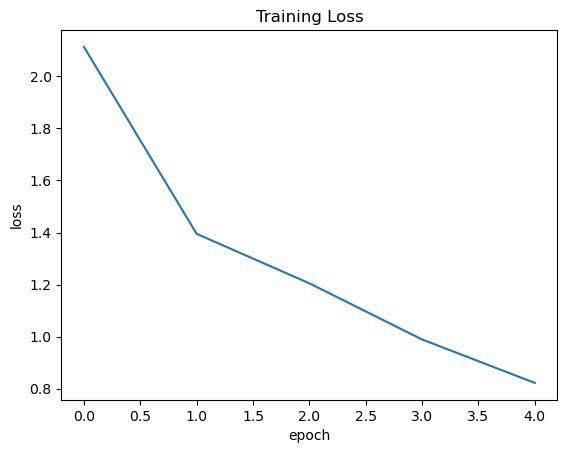

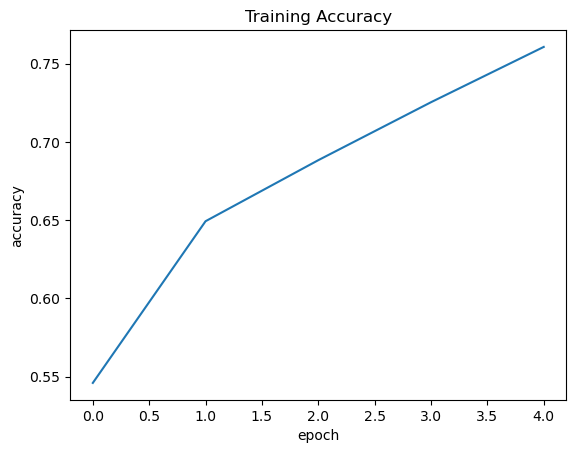

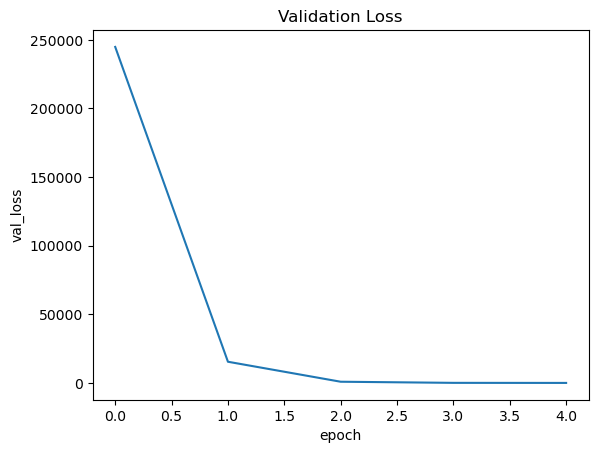

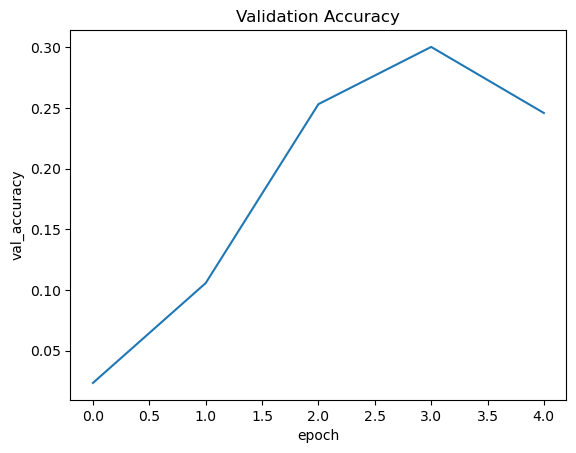

In [38]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=loss,
    metrics=["accuracy"],
)

history = model.fit(train_dataset, validation_data=val_dataset, epochs=5)

plt.plot(history.history["loss"])
plt.title("Training Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["accuracy"])
plt.title("Training Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["val_loss"])
plt.title("Validation Loss")
plt.ylabel("val_loss")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["val_accuracy"])
plt.title("Validation Accuracy")
plt.ylabel("val_accuracy")
plt.xlabel("epoch")
plt.show()

In [10]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>

In [11]:
val_dataset

<BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>

In [9]:
import os
import cv2 as cv
import numpy as np
from tqdm import tqdm

new_path = './label'
file_list = [os.path.join(new_path, file_name) for file_name in os.listdir(new_path)]
for file_ in tqdm(file_list):
    img = cv.imread(file_, cv.IMREAD_GRAYSCALE)
    cv.imwrite('./Category_ids/' + file_.strip("./label"), img)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './label'

In [17]:
cd /content/drive/MyDrive/제서/Surface_002

/content/drive/MyDrive/제서/Surface_002
